In [ ]:
import os
import gensim
from gensim import corpora
import logging
from tqdm import tqdm

In [ ]:
# 确保工作目录正确
os.chdir('/Users/jessie/Documents/Projects/Cusanus_Topic_Modeling')

# Step 1: 设置日志记录
log_dir = 'notebooks'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)  # 如果 notebooks 目录不存在则创建

log_path = os.path.join(log_dir, 'lda_testset_analysis.log')

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler(log_path),  # 将日志保存到 notebooks 文件夹中
        logging.StreamHandler()
    ]
)

logging.info("启动 LDA 主题建模分析（基线模型）")

In [ ]:
testset_dir = 'data/testset'
testset_files = [os.path.join(testset_dir, f) for f in os.listdir(testset_dir) if f.endswith('.txt')]
documents = []

In [ ]:
# 读取每个测试集文档内容
for file_path in tqdm(testset_files, desc="加载测试集文档"):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().split()  # 直接读取单词列表
        documents.append(content)

logging.info(f"从测试集加载了 {len(documents)} 个文档")

In [ ]:
# Step 4: 创建字典和语料库（用于 LDA）
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(text) for text in documents]

logging.info("创建了 LDA 所需的词典和语料库")

In [ ]:
# Step 5: 训练 LDA 模型
num_topics = 10  # 设置要生成的主题数
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

logging.info("LDA 模型训练完成")

In [ ]:
# Step 6: 显示 LDA 生成的主题
print("LDA 模型生成的主题：")
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx}: {topic}")
    logging.info(f"Topic {idx}: {topic}")

In [ ]:
# Step 7: 对每个文档进行主题分配
print("\n文档的主题分配：")
for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    print(f"文档 {os.path.basename(testset_files[i])}：")
    logging.info(f"文档 {os.path.basename(testset_files[i])}：")
    for topic_id, prob in doc_topics:
        print(f"  主题 {topic_id}：概率 = {prob:.2f}")
        logging.info(f"  主题 {topic_id}：概率 = {prob:.2f}")

In [ ]:
# Step 8: 段落级别的主题分配（可选的详细分析）
print("\n段落级别的主题分配：")
logging.info("开始进行段落级别的主题分配")

for file_path in tqdm(testset_files, desc="对段落进行主题分配"):
    with open(file_path, 'r', encoding='utf-8') as f:
        paragraphs = f.read().split('\n\n')  # 假设段落以双换行符分隔

    print(f"\n文档：{os.path.basename(file_path)}")
    logging.info(f"\n文档：{os.path.basename(file_path)}")
    for j, paragraph in enumerate(paragraphs):
        tokens = paragraph.split()  # 使用空格拆分段落中的单词（已经预处理）
        paragraph_bow = dictionary.doc2bow(tokens)
        paragraph_topics = lda_model.get_document_topics(paragraph_bow)

        print(f"  段落 {j + 1}：")
        logging.info(f"  段落 {j + 1}：")
        for topic_id, prob in paragraph_topics:
            print(f"    主题 {topic_id}：概率 = {prob:.2f}")
            logging.info(f"    主题 {topic_id}：概率 = {prob:.2f}")

logging.info("LDA 主题建模和段落分析完成")

2024-11-06 22:22:10,264 - INFO - NumExpr defaulting to 8 threads.
2024-11-06 22:22:18,271 - WARNING - Matplotlib is building the font cache; this may take a moment.
2024-11-06 22:22:30,069 - INFO - Failed to extract font properties from /System/Library/Fonts/Supplemental/NISC18030.ttf: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
2024-11-06 22:22:30,075 - INFO - Failed to extract font properties from /System/Library/PrivateFrameworks/FontServices.framework/Resources/Reserved/PingFangUI.ttc: In FT2Font: Can not load face (locations (loca) table missing; error code 0x90)
2024-11-06 22:22:30,254 - INFO - Failed to extract font properties from /System/Library/Fonts/Apple Color Emoji.ttc: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)
2024-11-06 22:22:30,256 - INFO - Failed to extract font properties from /System/Library/Fonts/LastResort.otf: tuple indices must be integers or slices, not str
2024-11-06 22:22:30,348 - INFO - gener


pyLDAvis 可视化已保存到: notebooks/lda_visualization.html

文档的主题分配情况已保存到: notebooks/document_topic_distributions.csv


/var/folders/jj/84v_jpsx4rj3__y62xh3klxm0000gn/T/ipykernel_35013/3509021598.py:52: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jj/84v_jpsx4rj3__y62xh3klxm0000gn/T/ipykernel_35013/3509021598.py:52: UserWarning: Glyph 39064 (\N{CJK UNIFIED IDEOGRAPH-9898}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jj/84v_jpsx4rj3__y62xh3klxm0000gn/T/ipykernel_35013/3509021598.py:52: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jj/84v_jpsx4rj3__y62xh3klxm0000gn/T/ipykernel_35013/3509021598.py:52: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jj/84v_jpsx4rj3__y62xh3klxm0000gn/T/ipykernel_35013/3509021598.py:52: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/jj/84v_

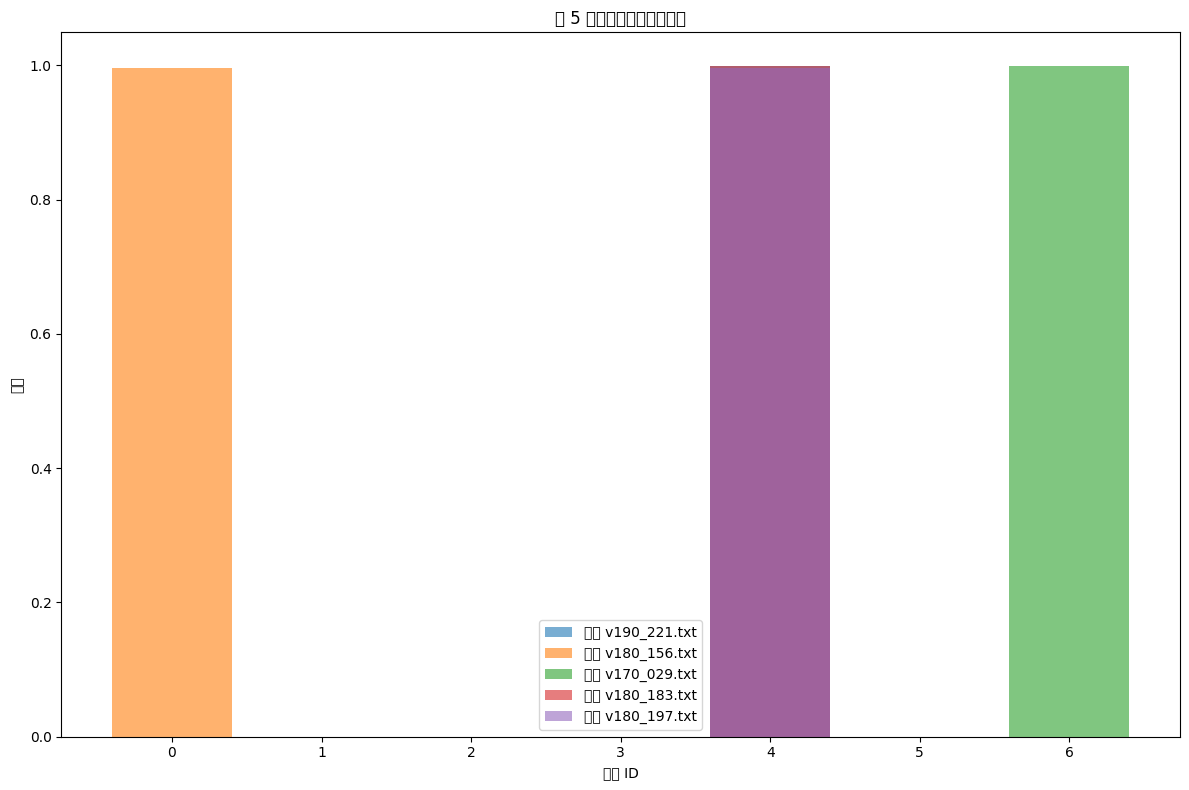

2024-11-06 22:22:34,458 - INFO - 主题分配的可视化展示完成
2024-11-06 22:22:34,458 - INFO - LDA 模型的所有步骤已完成，生成了多个输出结果包括主题建模日志、主题分配 CSV 文件和交互式 HTML 报告


In [10]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import pandas as pd

# Step 8: 使用 pyLDAvis 进行交互式可视化
logging.info("正在生成 pyLDAvis 交互式可视化...")

lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyldavis_path = os.path.join(log_dir, 'lda_visualization.html')
pyLDAvis.save_html(lda_visualization, pyldavis_path)

logging.info(f"pyLDAvis 可视化已生成并保存至: {pyldavis_path}")
print(f"\npyLDAvis 可视化已保存到: {pyldavis_path}")
logging.info("可以通过浏览器查看该文件，进行交互式的主题探索")

# Step 9: 将文档的主题分配情况保存为 CSV 文件
logging.info("开始保存文档的主题分配情况...")

doc_topic_distributions = []

for i, doc in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc)
    for topic_id, prob in doc_topics:
        doc_topic_distributions.append({
            "Document": os.path.basename(testset_files[i]),
            "Topic": topic_id,
            "Probability": prob
        })

# 保存为 CSV 文件
topic_distributions_df = pd.DataFrame(doc_topic_distributions)
csv_output_path = os.path.join(log_dir, 'document_topic_distributions.csv')
topic_distributions_df.to_csv(csv_output_path, index=False)

logging.info(f"文档的主题分配情况已保存至: {csv_output_path}")
print(f"\n文档的主题分配情况已保存到: {csv_output_path}")

# Step 10: 使用 matplotlib 对前几个文档的主题分配进行可视化
logging.info("开始对文档的主题分配进行可视化展示")

plt.figure(figsize=(12, 8))
for i, doc in enumerate(corpus[:5]):  # 可视化前 5 个文档
    doc_topics = lda_model.get_document_topics(doc)
    topics, probs = zip(*doc_topics)
    plt.bar(topics, probs, alpha=0.6, label=f'文档 {os.path.basename(testset_files[i])}')

plt.xlabel("主题 ID")
plt.ylabel("概率")
plt.title("前 5 个文档的主题分配情况")
plt.legend()
plt.tight_layout()
plt.show()

logging.info("主题分配的可视化展示完成")

# Summary Log Message
logging.info("LDA 模型的所有步骤已完成，生成了多个输出结果包括主题建模日志、主题分配 CSV 文件和交互式 HTML 报告")
